In this I am just pacticing the notebooks submitted by others and help to understand how get started with kaggle as a begginer and how to solve the problems as a whole.


* https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed
* https://www.kaggle.com/ash316/ml-from-scratch-part-2

The whole ML pipeline is referenced from below link
https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

However I am unable to get the part where we need to Interpreting or Data Storytelling. 
I am unable to actually form a simple story out of all the calculations and plot it down.
Any help would be appriciated.

# **Basic Data Science and ML Pipeline**

# **OSEMN Pipeline**

* O - Obtaining our data
* S - Scrubbing/Cleaning our data
* E - Exploring /Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data

For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D

# **O - Obtaining our data**

You cannot do anything as a data scientist without even having any data.
However there are some things you must take ingto consideration when obtaining your data.
1. Identify all available sources for this data (i.e. internet or /external/internal databases)
2. Extract data into a usable format (.csv, .json, .xml etc)

In our case we already have the data available from kaggle. We will load this data in the below code or rather with the help of the code already provided by kaggle, so that it will for our use in this notebook.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Importing necessary libraries
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Apply the default default seaborn theme, scaling, and color palette.
sns.set() 
import warnings
warnings.filterwarnings('ignore')
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document.
%matplotlib inline


In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

#Print the first 5 rows of the dataframe
diabetes_data.head()

# **Scrubbing / Cleaning Your Data**

This is an important phase as the results and output of your machine learning model depends on the quality of the data you put into the creating the model. 
This is also the phase of the pipeline that requires the most time and effort.

**Objectives**

1. **Examine the data**  understand every feature you're working with, identify errors, missing values, and corrupt records
2. **Clean the data** throw away, replace, and/or fill missing values/errors 

# **Check the dataset for any missing values**

* *isna()* function is used to detect missing values. 
* It return a *boolean* same-sized object indicating if the values are NA. 
* *NA* values, such as *None* or numpy *NaN*, gets mapped
* Now we apply *any()* function to check for any *True* among the False indicating that we have a NA value
* providing with parameter *axis=0* helps to search for the *columns*.

In [ ]:
diabetes_data.isna().any(axis=0)


# **Exploring (Exploratory Data Analysis)**

In this phase we try to **Understand** the patters and values our data has. 
We use different types of **visualizations** and **statistical testings** to get these findings.
This is how we would be able to **derive hidden meanings** behind our data **through various graphs and analysis**.

**Objective**
* Find patterns in your data through visualizations and charts
* Extract features by using statistics to identify and test significant variables

# dataframe.info()

* Pandas *dataframe.info()* function is used to get a concise summary of the dataframe. 

* It comes really handy when doing exploratory analysis of the data. 

* To get a quick overview of the dataset we use the *dataframe.info()* function.

* *Verbose(Parameter)* specifies whether to print the full summary.

In [ ]:
diabetes_data.info(verbose=True)

# dataframe.describe()

* *Dataframe.describe()* is used to view some based statuscal details like percentile, mean, std etc of a data frame or a seies of numeric values.
* It takes the following parameters 
* *percentile:* we provide a list of numbers 0-1 to return the respective percentiles.
* *include:* List of the data types to be inluded while describing  dataframe. Default value is *None*
* *exclude:* List of the data types to be exlude while describing  dataframe. Default value is *None*

The following is the Output of the describe function
* *count* tells us the number of Non-Empty rows in a feature
* *mean* tells us the mean value of the feature
* *std* tells us the Standard Deviation Value of that feature.
* *min* tells us the minimum value of that feature
* Now we have a *list of the percentile/quartile* of each feature. This also helps to detect Outliers
* *max* tells us the maximum value of that feature.

**Note** : 
* Only numerical columns would be displayed here unless parameter include='all' is given
* Dataframe.select_dtypes also helps in returning columns of a specific dtype


In [ ]:
diabetes_data.describe()

From the above we see that the mininum value of columns is 0. But having 0 as the minimum value for the below columns doesn't make scence does it?

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

For this purpose we will replace 0 with nan for counting purpose.
Later we will replace the 0 with suitable values.

In [ ]:
diabetes_copy = diabetes_data.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


print(diabetes_copy.isnull().sum())

To fill these Nan Values we need to understand the distribution of data

In [ ]:
p = diabetes_data.hist(figsize = (20,20))

We need to impute nan values for the colummns by using the distribution

In [ ]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].mean(), inplace=True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].mean(), inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].mean(), inplace=True)


Plotting after removing Nan

In [ ]:
p = diabetes_copy.hist(figsize = (20,20))

# Skewness
1. **Left-skewed distribution** 
    They have a long tail to its left. 
    Left-skewed distribution are negative-skewed distributions.
    The mean is to the left of the median.
2. **Right-skewed distribution**
    They have a long tail to its right.
    Right-skewed distribution are positive -skewed distributions.
    The mean is to the right of the median.
    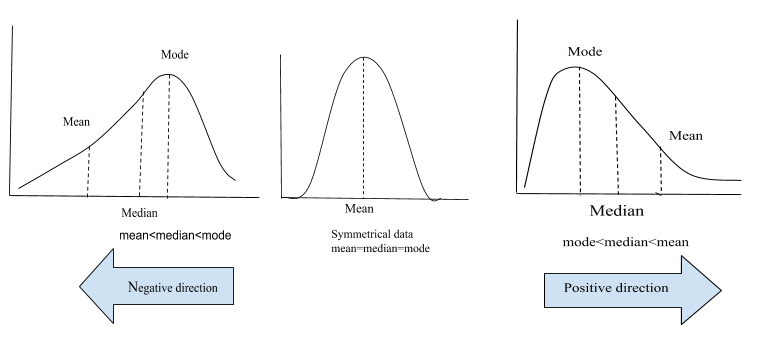

We will check if the data is skewed or not. 


In [ ]:

print(diabetes_data["Outcome"].value_counts())
p=diabetes_data["Outcome"].value_counts().plot(kind="bar")

From above we cansee that the data is biased towards non-diabetic records.

# Finding insights through correlation matrix

# What is Correlation?

Correlation basically means association - more precisely it is a measure of the extent to which one variable is related to another.
There are three possible results of correlation:-
1. Positive Correlation:
   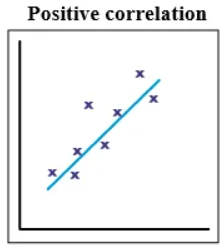
   The points lie close to a straight line, which has a positive gradient.
   This shows that as one varible increases the other increases.
2. Neative Correaltion
    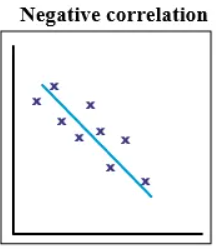
    The points lie close to a straight line, which has a negative gradient.
    This shows that as one varible increases, the other decreases.
3.  No Correlation
    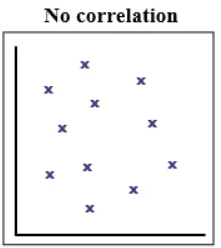
    There is no pattern to the points. 
    This shows that there is no connection between the two variables.

In [ ]:
diabetes_data.corr()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(diabetes_data,diag_kind='kde',hue='Outcome')

From the above correlation matrix we need to consider the *columns(eg. Pregnancies, Glucose etc)* with the *outcome* column

We see that the correlation between '*Glucose*' and '*Outcome*'is the highest.
Second to this we have the correlation between '*Pregnancies*' and '*Outcome*'

The same can be seen from the pairplot. As we can

When we look into the glucose column, the two colors we stated in hue actually represent the Diabetes = 1(blue) and Diabetes=0(Red)
If we take somewhat next level, if we look the mean of red distribution and the mean of Blue distribution.
We see that the above said means are significantly different from each other.
With this insight now we can link it to our problem statement and say that Glucose is an excellent predictor of diabetes.
We can see a significant seperation between the two distributions Diabetes and non-Diabetes.


A **heat map** is a two-dimensional representation of information with the help of colors. 

**Heat maps** can help the user visualize simple or complex information.

# Heatmap for unclean data

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  

# Heatmap for clean data

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes_copy.corr(), annot=True,cmap ='RdYlGn')  

# Scaling the data

data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
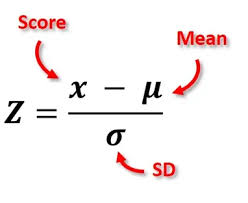

to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [ ]:
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X = pd.DataFrame(X_sc.fit_transform(diabetes_copy.drop(["Outcome"],axis = 1),),
                columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPredigreeFunction','Age'])

In [ ]:
X.head()

In [ ]:
y = diabetes_copy.Outcome

In [ ]:
y.head()

# **Modeling (Machine Learning)**

After cleaning your data and finding what features are most important, using your model as a predictive tool will help in your **decision making**

**Objective**

* **In-depth Analytics** : create predictive models/algorithms
* **Evaluate and refine the model**

# **Test Train Split**

The *train-test* split is a technique for evaluating the *performance* of a machine learning algorithm.

This technique can be used for *supervised learning algorithm* using *classification* and *regression* techniques.

In this technique we divide the original dataset into two subsets.
* **Train Dataset** : Used to fit the machine learning model.
* **Test Dataset** : Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.
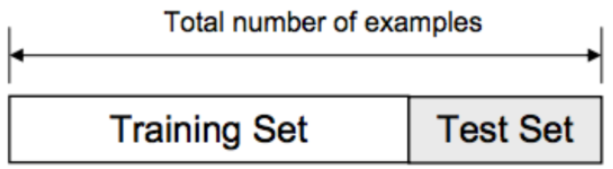

# **Cross Validation methods**

Cross-Validation is one of the technique used to test he effectiveness of a machine learning models, it is also a resampling procedure used to evaluate a model if we have a limited data.

Cross-validation uses the training data and breaks it down into smaller chunks to test again itself.

To perform cross validation we need to keep aside a sample/portion of the data which is not used t train the model, later this sample is used for testing/validation

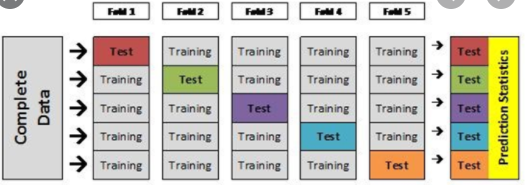

**Stratify Parameter** : this parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter.

For example: if the variable *y* is binary categorical variable with values *0* and *1* and there are *25%* of *zeros* and *75%* of *ones*, *stratify=y* will make sure that your random split has 25% of 0's and 75% of 1's

In [ ]:
#importing train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state = 42, stratify = y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x : x+1, train_scores_ind))))

In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i,v  in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

# **Visualizing the Results**

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*', label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',  label='Test Score')

From above we can see that we get the higest accuracy when **k = 11**. We will use this value for our final model

In [ ]:
# Setting knn clasifier with k neighbors
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

# **Interpreting (Data Storytelling)**

The most important step in the pipeline is to understand and learn how to explain your findings through communication. 

It is really very much appriciated that the outcome of all the above computations and predictions are communicated to the audience in a manner that can even kids can understand

**Objective**
* **Identify business insights** : return back to business problem
* **Visualize your findings accordingly** : keep it simple and priority driven
* **Tell a clear and actionable story** : effectively communicate to non-technical audience

In [ ]:
## trying to plot decision boundary

In [ ]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf= knn, legend=2,
                     filler_feature_values={2: value, 3: value, 4:value, 5:value, 6:value, 7:value},
                     filler_feature_ranges={2: width, 3: width, 4:width, 5:width, 6:width, 7:width},
                     X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()


Now that we have decided the value for *k*, and that we have built a model. Now we test it on it's performance

# **Model Performance Analysis**

# **1. Confusion Matrix**

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

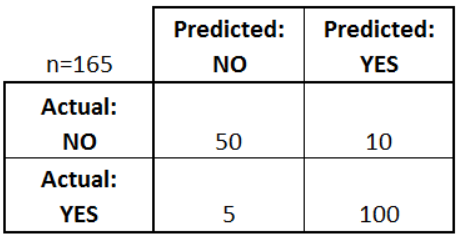

We can get the below insights from above matrix example.
* There are two predicted classes : "Yes" and "No". "Yes" means "Diabetic" and "No" means "Non-Diabetic"
* The classifier made a total of *165* predictions
* Out of these, the classifier predicted "Yes" 110 times, and "No" 55 times.
* In reality, 105 are Diabetic and 60 are "Non-Diabetic"

**Some Basic Terms**

* **True Positives (TP)**: These are cases in which we predicted yes(Diabetic), and they really are Diabetic
* **True Negative (TN)** : We predicted Non-Diabetic but they had Diabeties.
* **False Positive (FP)** : We predicted Diabetic, but they were Non Diabetic. (Type I error)
* **False Negative (FN)** : We predicted Non Diabetic, but they were Diabetic. (Type II Error)

The following are the terms when added to the Condusion Matrix.

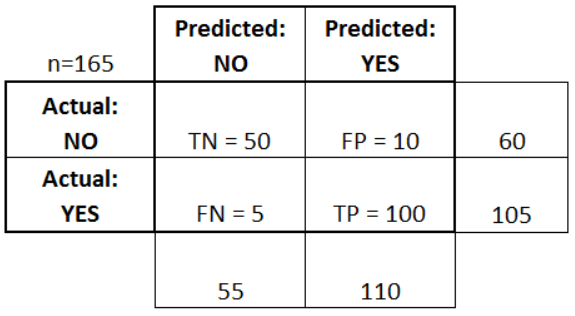

Now we can also calculate some of the common rates from a confusion matrix for a binary classification.

* **Accuracy** : How often does the classifier correctly identifies a Diabetic patient.
* * (TP+TN)/total = (100+50)/165 = 0.91



* **Misclassification Rate** : How often the classifier incorrectly identifies Diabetic as Non Diabetic. 
* * equal to 1 minus Accuracy 
* * This is also known as "**Error Rate**" 
* * (FP+ FN)/total = (10+5)/165 = 0.09 



* **True Positive Rate** : When it's actually Diabetic, How often does it predict Diabetic. 
* * This is also known as "Recall" 
* * TP/Actual Yes = 100/105 = 0.95 



* **False Positive Rate** : When it's actually Non Diabetic. How often does it predict Diabetic.
* * FP/actual no = 10/60 = 0.17



* **True Negative Rate** : When the patient is Non-Diabetic how often does it predict Non-Diabetic 
* * equal to 1 - (False Positive Rate)
* * This is also known as "Specificity" 
* * (FP+ FN)/total = (10+5)/165 = 0.09 



* **Precision** : When it predicts Diabetic. How often is it correct?
* * TP/predicted yes = 100/110 = 0.91 



* **Prevalence** : How often does Diabetic patient actually occour in our sample?
* * actual yes/total = 105/165 = 0.64



* **Null Error Rate** : How often the classifier is wrong if you predicted the majority class. This can be the best classifier to compare your classifier against. 
* * Actual No/total = 60/165=0.36 



* **Cohen's Kappa** : This value is high when there is a big difference between the accuracy and the null error rate. 



* **F Score** :Weighted average of the true positive rate(recall) and precision 
* * 2 ((Precision*Recall)/(Precision + Recall)) 



* **ROC Curve** : This is commonly used graph that summarizes the prformace of a classifier over all possible thresholds. 
* * It is generated by plotting the True Positive Rate(y-axis) againse the False Positive Rate (x-axis) as you vary the threshold for assigning observaations to a given class

In [ ]:
# import confustion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Classification Report**

Report which includes Precision, Recall and F1-Score

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# **ROC-AUC**

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# **Hyper Parameter optimization**

**Parameter**
Configuration variable that is internal to the model and whose value can be estimated from the given data.

**Hyperparameter**
Confiduration variable  that is external to the model and whose value cannot be estimated from data.

**Hyperparamter tuning** 
Methodically build and evaluate a model for each combination of algorithm paramters specified in a grid.

**Approaches to Hyperparameter optimization**
1. Manual Search
2. Random Search
3. Grid Search
4. Automated Hyperparameter Tuning (Bayesian Optimization, Genetic Algorithms)
5. Artificial Neural Networks (ANNs) Tuning

**Two simple strategies to optimize/tune the hyperparameters**

1. **Grid searching of hyperparameters**
    Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

2. **Random searching of hyperparameters:**
    The idea of random searching of hyperparameters was proposed by James Bergstra & Yoshua Bengio. You can check the original paper here.



In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))